## DE Assignment 07
### Name: Kushagra Singh
### Panel: B1
### Roll no.: 17
### PRN: 1032220949

In [3]:
# DE LAB 7
from google.colab import files
uploaded = files.upload()


Saving data_dt.csv to data_dt.csv


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df = pd.read_csv('data_dt.csv')
df.head()


,ID,Age,Income,Gender,Martial Status,Buys
0,1,0-21,High,Male,Single,No
1,2,0-21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,35-100,Medium,Male,Single,Yes
4,5,35-100,Low,Female,Single,Yes


In [5]:
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Income'] = le.fit_transform(df['Income'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Martial Status'] = le.fit_transform(df['Martial Status'])
df['Buys'] = le.fit_transform(df['Buys'])
df.head()  # Display the updated DataFrame


,ID,Age,Income,Gender,Martial Status,Buys
0,1,0,0,1,1,0
1,2,0,0,1,0,0
2,3,1,0,1,1,1
3,4,2,2,1,1,1
4,5,2,1,0,1,1


In [6]:
X = df.iloc[:, 1:-1]  # Features
y = df.iloc[:, -1]    # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))


11
3


In [7]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)


In [9]:
# Calculate the f1 score
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")

# Calculate the precision score
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
print(f"Precision Score (Micro): {precision_micro}")
print(f"Precision Score (Macro): {precision_macro}")

# Calculate the recall score
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
print(f"Recall Score (Micro): {recall_micro}")
print(f"Recall Score (Macro): {recall_macro}")


F1 Score (Micro): 0.6666666666666666
F1 Score (Macro): 0.6666666666666666
Precision Score (Micro): 0.6666666666666666
Precision Score (Macro): 0.75
Recall Score (Micro): 0.6666666666666666
Recall Score (Macro): 0.75


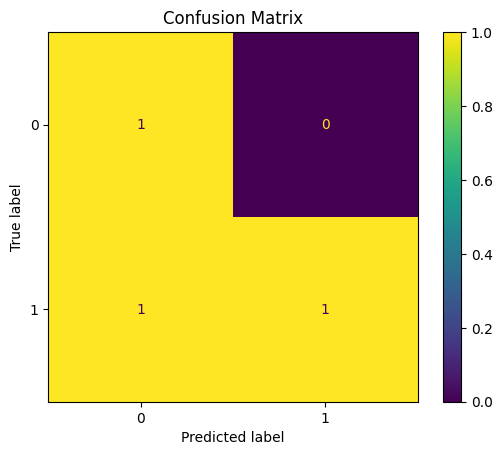

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


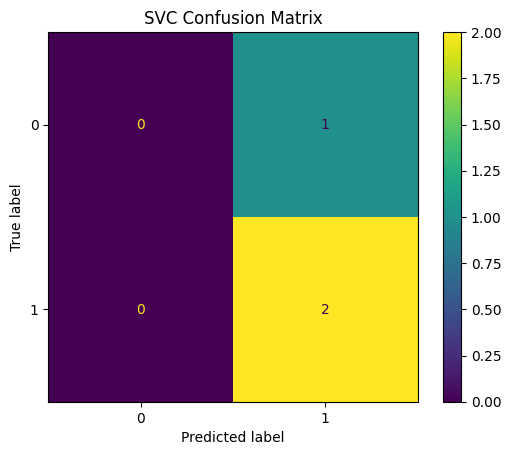

In [11]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate synthetic dataset
X_synthetic, y_synthetic = make_classification(random_state=5)
clf = SVC(random_state=5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Confusion matrix for SVC
cm_svc = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=clf.classes_)
disp_svc.plot()
plt.title('SVC Confusion Matrix')
plt.show()
